# Exploration


In [1]:
# Importing Necessary packages 
import pandas as pd
import numpy as np
from Utils.Metrics import Metrics
from Utils.ModelStats import ModelStats
from Utils.Preprocessor import TrainingPreprocessor

In [2]:
exchange = 'Bitfinex'

# Input cleaned data

In [3]:
# Importing Exchange Data
book = pd.read_csv(f"Data/{exchange}/book/{exchange}_cleaned.csv",error_bad_lines=False, engine="python")
book = book.sort_values('receipt_timestamp')

In [4]:
trades = pd.read_csv(f"Data/{exchange}/trade/{exchange}_trades.csv")
trades = trades.sort_values('receipt_timestamp')

In [5]:
book.shape

(1070878, 11)

In [6]:
trades.shape

(156052, 10)

In [7]:
book.head()

,Unnamed: 0,Unnamed: 0.1,receipt_timestamp,bid,ask,best_bid_price,best_ask_price,best_bid_volume,best_ask_volume,bid_total_depth,ask_total_depth
0,0,83886,2021-09-16 15:52:38.140,"{'47553.24':'0.25232','47552.13':'0.017','4754...","{'47553.25':'0.075','47554.64':'1.05127','4755...",47553.24,47553.25,0.25232,0.075000,4.424740,4.966640
1,1,84890,2021-09-16 15:52:38.204,"{'47591':'0.0002','47590':'0.0002','47589':'0....","{'47592':'3.4478725900000002','47593':'0.21024...",47591.00,47592.00,0.00020,3.447873,1.787602,15.368841
2,2,84891,2021-09-16 15:52:38.211,"{'47591':'0.0002','47590':'0.0002','47589':'0....","{'47592':'3.44662505','47593':'0.210249','4759...",47591.00,47592.00,0.00020,3.446625,1.787602,15.367593
3,3,83888,2021-09-16 15:52:38.341,"{'47553.24':'0.25165','47552.13':'0.017','4754...","{'47553.25':'0.01643','47554.63':'0.36802','47...",47553.24,47553.25,0.25165,0.016430,4.232130,4.783810
4,4,83889,2021-09-16 15:52:38.439,"{'47553.24':'0.27665','47552.13':'0.017','4754...","{'47553.25':'0.00916','47554.63':'0.36802','47...",47553.24,47553.25,0.27665,0.009160,4.257130,4.776540


In [8]:
trades.head()

,Unnamed: 0,feed,symbol,timestamp,receipt_timestamp,side,amount,price,order_type,id
106406,557532,BITFINEX,BTC-USD,1970-01-01 01:00:00.000,2021-09-16 11:13:31.709,buy,0.001652,48136.768189,NaN,829698397
106407,557533,BITFINEX,BTC-USD,1970-01-01 01:00:00.000,2021-09-16 11:13:31.710,buy,0.100000,48137.000000,NaN,829698399
106408,557534,BITFINEX,BTC-USD,1970-01-01 01:00:00.000,2021-09-16 11:13:31.711,buy,0.024270,48137.000000,NaN,829698400
106409,557535,BITFINEX,BTC-USD,1970-01-01 01:00:00.000,2021-09-16 11:13:31.870,buy,0.070000,48138.000000,NaN,829698401
106410,557536,BITFINEX,BTC-USD,1970-01-01 01:00:00.000,2021-09-16 11:13:32.908,buy,0.000400,48142.291944,NaN,829698402


# Basic Statistics

In [9]:
book.describe()

,Unnamed: 0,Unnamed: 0.1,best_bid_price,best_ask_price,best_bid_volume,best_ask_volume,bid_total_depth,ask_total_depth
count,1.070878e+06,1.070878e+06,1.070878e+06,1.070878e+06,1.070878e+06,1.070878e+06,1.070878e+06,1.070878e+06
mean,5.616117e+04,5.196628e+06,4.772334e+04,4.772483e+04,1.058736e+00,1.118732e+00,9.979630e+00,1.039099e+01
std,3.672838e+04,3.176548e+06,3.641765e+02,3.639573e+02,2.886894e+00,2.089361e+00,8.567722e+00,5.678554e+00
min,0.000000e+00,5.000000e+00,4.677100e+04,4.677500e+04,1.000000e-08,1.000000e-08,1.742000e-02,3.632737e-02
25%,2.594200e+04,2.278933e+06,4.748900e+04,4.749018e+04,6.029596e-02,7.086000e-02,6.598750e+00,6.570581e+00
50%,5.271500e+04,5.232589e+06,4.768200e+04,4.768378e+04,3.574697e-01,3.786273e-01,9.552727e+00,1.010655e+01
75%,7.956600e+04,8.393518e+06,4.795500e+04,4.795563e+04,1.302444e+00,1.326407e+00,1.242872e+01,1.321780e+01
max,1.584970e+05,1.005523e+07,4.881500e+04,4.881900e+04,1.204941e+03,9.772888e+01,1.215559e+03,1.123945e+02


In [10]:
trades.describe()

,Unnamed: 0,amount,price,order_type,id
count,156052.000000,1.560520e+05,156052.000000,0.0,1.560520e+05
mean,298131.044972,3.781888e-02,47711.097871,NaN,8.307459e+08
std,195959.096479,1.428967e-01,447.242545,NaN,6.125076e+05
min,112318.000000,1.000000e-08,46771.000000,NaN,8.296984e+08
25%,151330.750000,2.000000e-04,47394.000000,NaN,8.302076e+08
50%,190343.500000,4.000000e-04,47652.000000,NaN,8.307987e+08
75%,568164.250000,1.730579e-02,47980.314156,NaN,8.313207e+08
max,607177.000000,8.991827e+00,48819.000000,NaN,8.316567e+08


# OFI/ TFI

In [11]:
def ofi_tfi(quotes, trades, dt):
    qdf = quotes.copy().reset_index()
    tdf = trades.copy().reset_index()
    
    qdf['timestamp'] = pd.to_datetime(qdf['receipt_timestamp'])
    tdf['timestamp'] = pd.to_datetime(tdf['receipt_timestamp'])
                                      
    # TFI
    tdf['sgn_size'] = np.where(tdf['side'] == 'buy', tdf['amount'], -tdf['amount'])
    
    # Mid-price change 
    qdf['Mid-Price'] = (qdf['best_bid_price'] + qdf['best_ask_price'])/2
    qdf['Mid-Price Percent Change'] = np.log(qdf['Mid-Price']) - np.log(qdf['Mid-Price'].shift(1))
    qdf['Mid-Price Change'] = ((qdf['best_bid_price'] + qdf['best_ask_price'])/2).diff().div(0.1)
    qdf['Spread'] = qdf['best_ask_price'] - qdf['best_bid_price']
    
    # Previous bid and ask prices 
    qdf['prev_bidprice'] = qdf['best_bid_price'].shift()
    qdf['prev_bidsize'] = qdf['best_bid_volume'].shift()
    qdf['prev_askprice'] = qdf['best_ask_price'].shift()
    qdf['prev_asksize'] = qdf['best_ask_volume'].shift()

    qdf.dropna(inplace=True)
    
    # Creation of Identity Functions for OFI
    bid_geq = qdf['best_bid_price'] >= qdf['prev_bidprice']
    bid_leq = qdf['best_bid_price'] <= qdf['prev_bidprice']
    ask_geq = qdf['best_ask_price'] >= qdf['prev_askprice']
    ask_leq = qdf['best_ask_price'] <= qdf['prev_askprice']
    
    # Creation of OFI Variable
    qdf['OFI'] = 0
    qdf['OFI'].loc[bid_geq] += qdf['best_bid_volume'].loc[bid_geq]
    qdf['OFI'].loc[bid_leq] -= qdf['prev_bidsize'].loc[bid_leq]
    qdf['OFI'].loc[ask_geq] += qdf['prev_asksize'][ask_geq]
    qdf['OFI'].loc[ask_leq] -= qdf['best_ask_volume'][ask_leq]
    
    # Creation of ODI Variable
    qdf['ODI'] = 0
    qdf['ODI'].loc[bid_leq] += 1
    qdf['ODI'].loc[ask_geq] -= 1
    
    # Depth imbalance 
    qdf['Depth_diff'] = qdf['ask_total_depth'] - qdf['bid_total_depth']
    qdf = qdf.set_index('timestamp')
    tdf = tdf.set_index('timestamp')
    
    qdf = qdf[['Mid-Price Percent Change','OFI','ODI','Spread','Depth_diff']].resample(dt).sum().dropna()
    tf = tdf['sgn_size'].resample(dt).sum().fillna(0.0)
    qdf.name = 'OFI_df_' + str(dt)
                                      
    ofi_tfi_df = pd.merge(qdf, tf, left_index=True, right_index=True)
    ofi_tfi_df['OFI Difference'] = ofi_tfi_df['OFI'] - ofi_tfi_df['OFI'].shift(1)
    ofi_tfi_df['ODI Difference'] = ofi_tfi_df['ODI'] - ofi_tfi_df['ODI'].shift(1)
    ofi_tfi_df['TFI Difference'] = ofi_tfi_df['sgn_size'] - ofi_tfi_df['sgn_size'].shift(1)
    ofi_tfi_df['change_t1'] = ofi_tfi_df['Mid-Price Percent Change'].shift(1)
    return ofi_tfi_df.dropna()


In [12]:
time_differences = ['1S', '10S','30S', '1T', '5T', '10T']

dt = '1T'

book_processed = ofi_tfi(book, trades, dt)

/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
book_processed.shape

(2696, 10)

In [14]:
book_processed.head(10)

,Mid-Price Percent Change,OFI,ODI,Spread,Depth_diff,sgn_size,OFI Difference,ODI Difference,TFI Difference,change_t1
timestamp,,,,,,,,,,
2021-09-16 15:53:00,-0.000255,-7.838233,27,1626.93,3035.259100,0.544180,-32.768119,25.0,0.234222,0.000188
2021-09-16 15:54:00,-0.001542,-78.110394,43,2159.96,-12725.920527,-0.785061,-70.272161,16.0,-1.329241,-0.000255
2021-09-16 15:55:00,0.002035,21.962702,-6,1579.03,-11537.948210,2.213451,100.073096,-49.0,2.998512,-0.001542
2021-09-16 15:56:00,-0.000432,-16.062662,-6,868.58,1551.697926,0.748256,-38.025365,0.0,-1.465195,0.002035
2021-09-16 15:57:00,-0.002054,-92.350093,-1,1109.80,-12696.819709,-33.199378,-76.287431,5.0,-33.947634,-0.000432
2021-09-16 15:58:00,0.001095,55.296822,3,1623.54,-2584.308214,-3.295822,147.646915,4.0,29.903556,-0.002054
2021-09-16 15:59:00,-0.001124,-15.530139,14,768.84,-1695.144139,-0.065716,-70.826961,11.0,3.230106,0.001095
2021-09-16 16:00:00,-0.000253,-14.929253,24,3927.80,4982.276450,-17.710502,0.600886,10.0,-17.644785,-0.001124
2021-09-16 16:01:00,0.001537,89.229368,-16,976.10,-1374.659331,4.613355,104.158621,-40.0,22.323856,-0.000253


# Correlations

In [15]:
metrics_generator = Metrics()

In [16]:
book_processed.corr()

,Mid-Price Percent Change,OFI,ODI,Spread,Depth_diff,sgn_size,OFI Difference,ODI Difference,TFI Difference,change_t1
Mid-Price Percent Change,1.000000,0.434783,-0.596727,0.104969,-0.349928,0.429877,0.333315,-0.486221,0.325814,-0.088688
OFI,0.434783,1.000000,-0.445753,0.034515,-0.435653,0.209872,0.675270,-0.291188,0.157403,0.023604
ODI,-0.596727,-0.445753,1.000000,0.051402,0.302111,-0.164370,-0.289422,0.638250,-0.116022,-0.023413
Spread,0.104969,0.034515,0.051402,1.000000,-0.049210,0.014689,0.020880,0.025852,0.066611,-0.003521
Depth_diff,-0.349928,-0.435653,0.302111,-0.049210,1.000000,-0.145133,-0.123213,0.082439,-0.008525,-0.232508
sgn_size,0.429877,0.209872,-0.164370,0.014689,-0.145133,1.000000,0.132654,-0.085141,0.679832,0.049916
OFI Difference,0.333315,0.675270,-0.289422,0.020880,-0.123213,0.132654,1.000000,-0.442297,0.214110,-0.304475
ODI Difference,-0.486221,-0.291188,0.638250,0.025852,0.082439,-0.085141,-0.442297,1.000000,-0.153506,0.449107
TFI Difference,0.325814,0.157403,-0.116022,0.066611,-0.008525,0.679832,0.214110,-0.153506,1.000000,-0.279456
change_t1,-0.088688,0.023604,-0.023413,-0.003521,-0.232508,0.049916,-0.304475,0.449107,-0.279456,1.000000


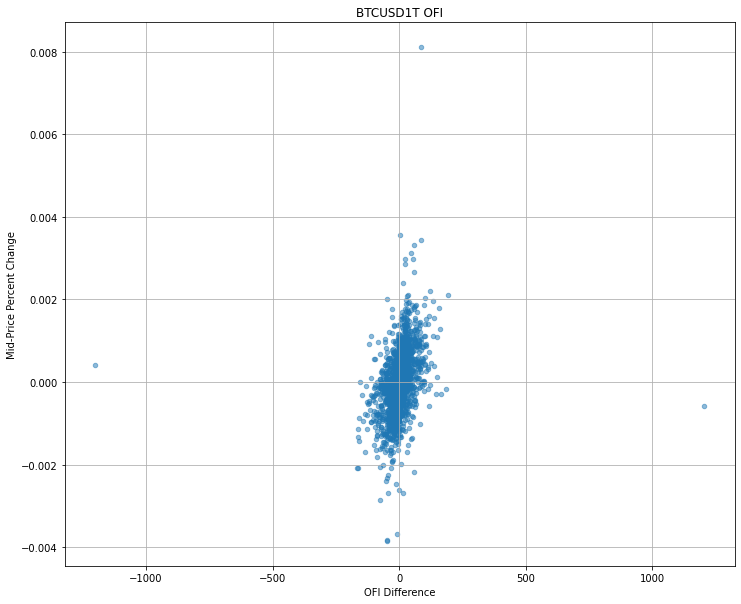

In [17]:
metrics_generator.plot_correlation(book_processed, 'OFI Difference', 'Mid-Price Percent Change', coin='BTCUSD', dt=dt)

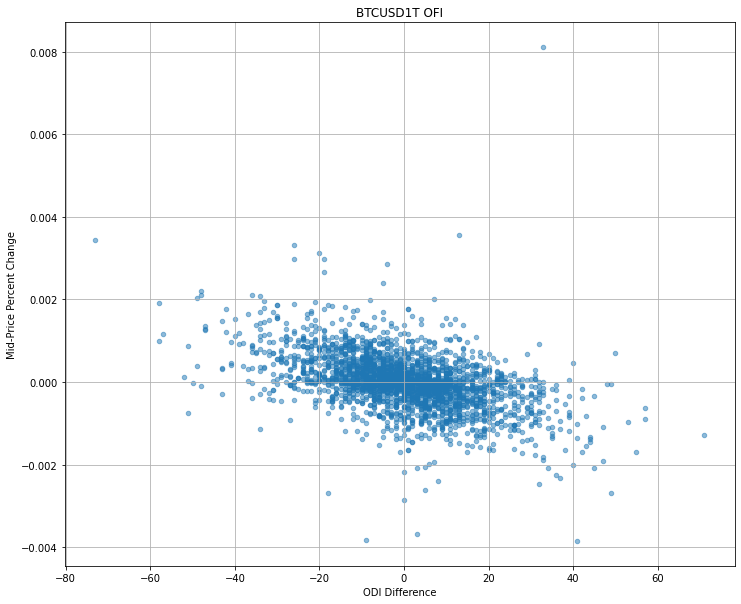

In [18]:
metrics_generator.plot_correlation(book_processed, 'ODI Difference', 'Mid-Price Percent Change', coin='BTCUSD', dt=dt)

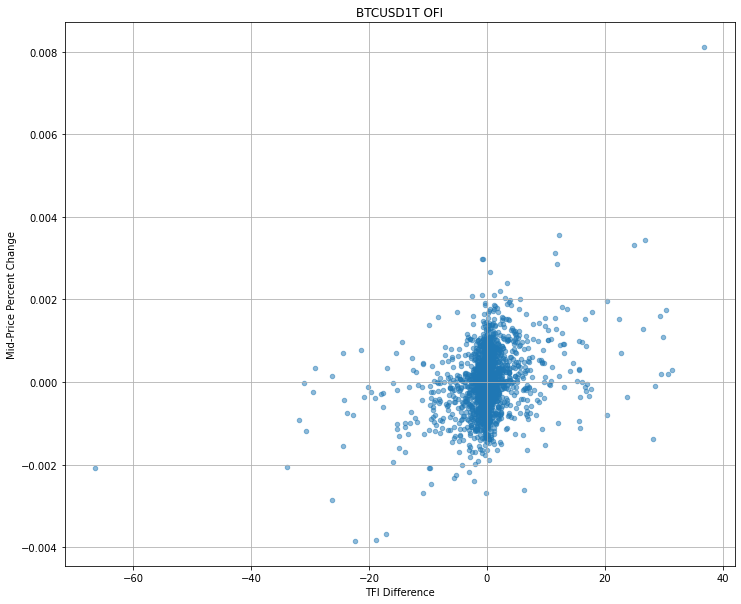

In [19]:
metrics_generator.plot_correlation(book_processed, 'TFI Difference', 'Mid-Price Percent Change', coin='BTCUSD', dt=dt)

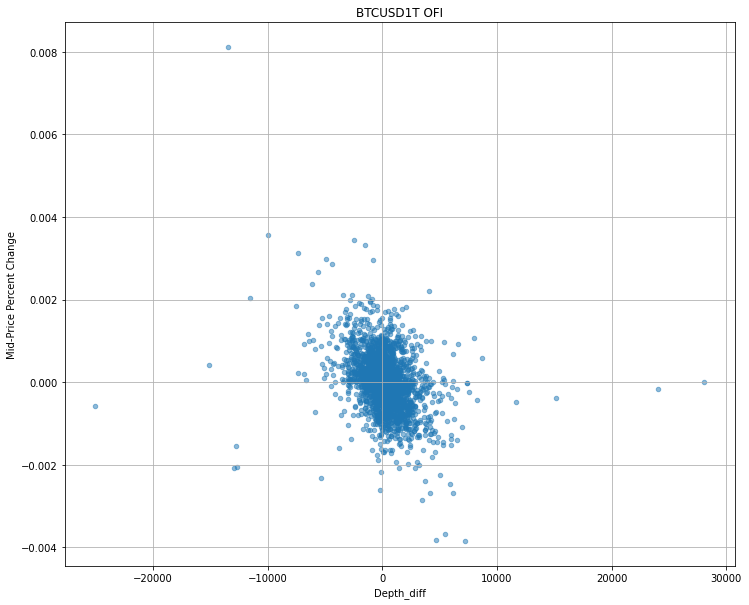

In [20]:
metrics_generator.plot_correlation(book_processed, 'Depth_diff', 'Mid-Price Percent Change', coin='BTCUSD', dt=dt)

# General Regressions

In [21]:
metrics_generator.plot_ols_summary(book_processed, ['OFI Difference'], 'Mid-Price Percent Change')

                      Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.111      
Dependent Variable: Mid-Price Percent Change AIC:                -31999.7412
Date:               2021-10-01 09:26         BIC:                -31987.9421
No. Observations:   2696                     Log-Likelihood:     16002.     
Df Model:           1                        F-statistic:        336.7      
Df Residuals:       2694                     Prob (F-statistic): 5.86e-71   
R-squared:          0.111                    Scale:              4.0965e-07 
-------------------------------------------------------------------------------
                   Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
-------------------------------------------------------------------------------
const              0.0000      0.0000     0.6618    0.5082    -0.0000    0.0000
OFI Difference     0.0000      0.0000    18.3496    0.0000     0.0000    0.0000
-------

/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
metrics_generator.plot_ols_summary(book_processed, ['ODI Difference'], 'Mid-Price Percent Change')

                      Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.236      
Dependent Variable: Mid-Price Percent Change AIC:                -32409.4140
Date:               2021-10-01 09:26         BIC:                -32397.6149
No. Observations:   2696                     Log-Likelihood:     16207.     
Df Model:           1                        F-statistic:        834.1      
Df Residuals:       2694                     Prob (F-statistic): 5.15e-160  
R-squared:          0.236                    Scale:              3.5190e-07 
------------------------------------------------------------------------------
                     Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
------------------------------------------------------------------------------
const                0.0000     0.0000     0.7105   0.4774   -0.0000    0.0000
ODI Difference      -0.0000     0.0000   -28.8804   0.0000   -0.0000   -0.0000
------------

/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
metrics_generator.plot_ols_summary(book_processed, ['TFI Difference'], 'Mid-Price Percent Change')

                      Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.106      
Dependent Variable: Mid-Price Percent Change AIC:                -31984.7876
Date:               2021-10-01 09:26         BIC:                -31972.9885
No. Observations:   2696                     Log-Likelihood:     15994.     
Df Model:           1                        F-statistic:        319.9      
Df Residuals:       2694                     Prob (F-statistic): 1.05e-67   
R-squared:          0.106                    Scale:              4.1193e-07 
-------------------------------------------------------------------------------
                   Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
-------------------------------------------------------------------------------
const              0.0000      0.0000     0.6567    0.5114    -0.0000    0.0000
TFI Difference     0.0000      0.0000    17.8870    0.0000     0.0000    0.0001
-------

/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
metrics_generator.plot_ols_summary(book_processed, ['ODI Difference','OFI Difference'], 'Mid-Price Percent Change')

                      Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.253      
Dependent Variable: Mid-Price Percent Change AIC:                -32469.5122
Date:               2021-10-01 09:26         BIC:                -32451.8136
No. Observations:   2696                     Log-Likelihood:     16238.     
Df Model:           2                        F-statistic:        458.0      
Df Residuals:       2693                     Prob (F-statistic): 6.33e-172  
R-squared:          0.254                    Scale:              3.4402e-07 
------------------------------------------------------------------------------
                     Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
------------------------------------------------------------------------------
const                0.0000     0.0000     0.7204   0.4714   -0.0000    0.0000
ODI Difference      -0.0000     0.0000   -22.6934   0.0000   -0.0000   -0.0000
OFI Differen

/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
metrics_generator.plot_ols_summary(book_processed, ['ODI Difference','OFI Difference','TFI Difference'], 'Mid-Price Percent Change')

                      Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.309      
Dependent Variable: Mid-Price Percent Change AIC:                -32676.0269
Date:               2021-10-01 09:26         BIC:                -32652.4288
No. Observations:   2696                     Log-Likelihood:     16342.     
Df Model:           3                        F-statistic:        401.9      
Df Residuals:       2692                     Prob (F-statistic): 1.04e-215  
R-squared:          0.309                    Scale:              3.1853e-07 
------------------------------------------------------------------------------
                     Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
------------------------------------------------------------------------------
const                0.0000     0.0000     0.7486   0.4542   -0.0000    0.0000
ODI Difference      -0.0000     0.0000   -22.5430   0.0000   -0.0000   -0.0000
OFI Differen

/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Exploring 

ADF Statistic: -17.585592994747483
p-value: 3.9873518407726944e-30
Critial Values:
   1%, -3.4327860097199814
   5%, -2.862616249081039
   10%, -2.5673429234848517
KPSS Statistic: 0.13367124289670246
p-value: 0.1
num lags: 28
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


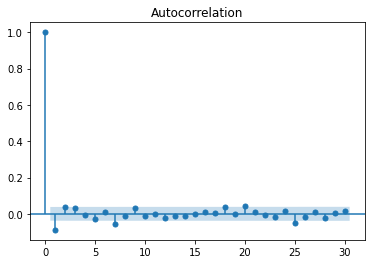

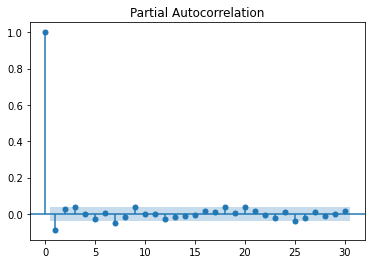

In [26]:
metrics_generator.adf(book_processed['Mid-Price Percent Change'].values)
metrics_generator.kpss_test(book_processed['Mid-Price Percent Change'].values)
metrics_generator.plot_acf_pacf(book_processed['Mid-Price Percent Change'].values)

ADF Statistic: -11.716697854239687
p-value: 1.4455305612538729e-21
Critial Values:
   1%, -3.4327905554828577
   5%, -2.8626182566141165
   10%, -2.5673439923015366
KPSS Statistic: 0.4924896990978956
p-value: 0.04335817587885235
num lags: 28
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


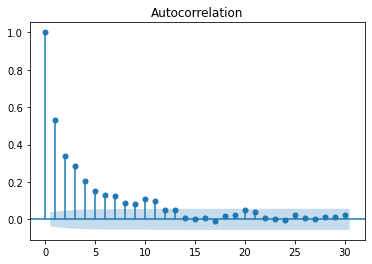

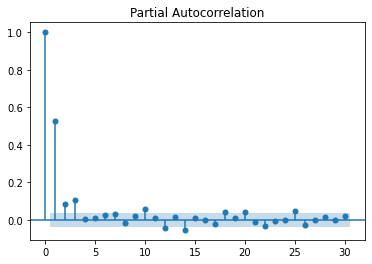

In [27]:
metrics_generator.adf(book_processed['Depth_diff'].values)
metrics_generator.kpss_test(book_processed['Depth_diff'].values)
metrics_generator.plot_acf_pacf(book_processed['Depth_diff'].values)

ADF Statistic: -16.94911561883417
p-value: 9.490655021723551e-30
Critial Values:
   1%, -3.4328042951371307
   5%, -2.86262432440224
   10%, -2.5673472228134027
KPSS Statistic: 0.006483083293645485
p-value: 0.1
num lags: 28
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


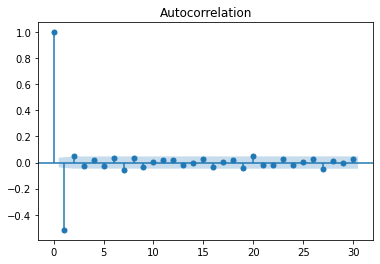

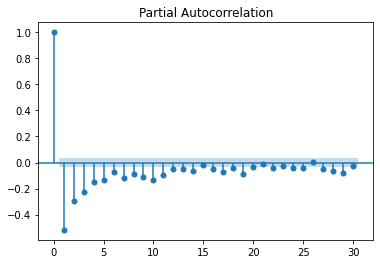

In [28]:
metrics_generator.adf(book_processed['OFI Difference'].values)
metrics_generator.kpss_test(book_processed['OFI Difference'].values)
metrics_generator.plot_acf_pacf(book_processed['OFI Difference'].values)

ADF Statistic: -14.994511607936413
p-value: 1.1127804923726428e-27
Critial Values:
   1%, -3.4328042951371307
   5%, -2.86262432440224
   10%, -2.5673472228134027
KPSS Statistic: 0.0055299966464810325
p-value: 0.1
num lags: 28
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


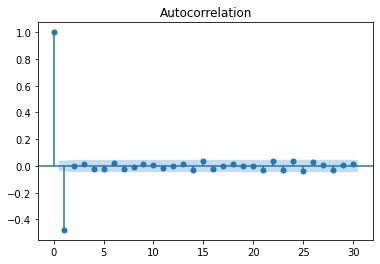

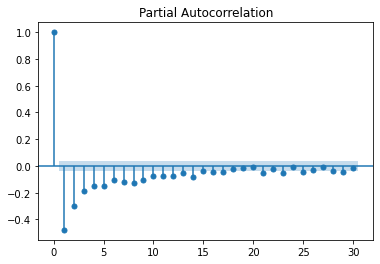

In [29]:
metrics_generator.adf(book_processed['ODI Difference'].values)
metrics_generator.kpss_test(book_processed['ODI Difference'].values)
metrics_generator.plot_acf_pacf(book_processed['ODI Difference'].values)

ADF Statistic: -17.979645227639452
p-value: 2.777641943083355e-30
Critial Values:
   1%, -3.432801534844111
   5%, -2.862623105387403
   10%, -2.5673465738052155
KPSS Statistic: 0.0053677457766742615
p-value: 0.1
num lags: 28
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/imperialhound/anaconda3/envs/cuda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


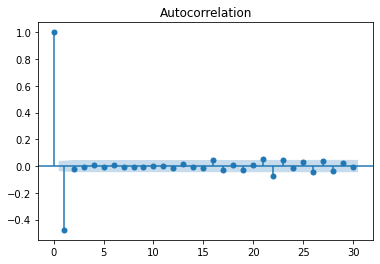

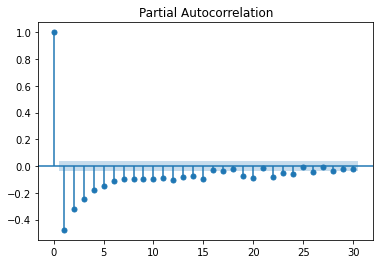

In [30]:
metrics_generator.adf(book_processed['TFI Difference'].values)
metrics_generator.kpss_test(book_processed['TFI Difference'].values)
metrics_generator.plot_acf_pacf(book_processed['TFI Difference'].values)

# Simple Predictions - Testing Theory

In [31]:
# Organize dataframe for training 
time_series_hidden = book_processed[['Mid-Price Percent Change', 'Depth_diff','OFI Difference','ODI Difference','TFI Difference','change_t1']]
time_series_no_hidden = book_processed[['Mid-Price Percent Change', 'Depth_diff','OFI Difference','TFI Difference','change_t1']]

In [32]:
model_statistics = ModelStats(random_walk=True, df=time_series_no_hidden, model='linear regression', target='change_t1')
rmse, r2, predictions_list, ytest_list = model_statistics.generate_model_statistics()

RMSE: 0.00061619392032448
R_Squared Score : 0.06950050100106916


In [33]:
model_statistics = ModelStats(random_walk=False, df=time_series_no_hidden, model='linear regression', target='change_t1')
rmse, r2, predictions_list, ytest_list = model_statistics.generate_model_statistics()

RMSE: 0.0005518390045923218
R_Squared Score : 0.44927190561932656


In [34]:
model_statistics = ModelStats(random_walk=False, df=time_series_hidden, model='linear regression', target='change_t1')
rmse, r2, predictions_list, ytest_list = model_statistics.generate_model_statistics()

RMSE: 0.0005014578143000695
R_Squared Score : 0.5838926576912767
